## Imports

In [1]:
import os, glob
import pandas as pd

## Google Colab - use this part

### Google Drive pre-requisite

In [19]:
# Only works within Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the list of HRV files

In [20]:
# Change of directory to be in the folder where HRV files are
path_to_hrv_files = '/content/drive/MyDrive/core simulateur/data/'
os.chdir(path_to_hrv_files)

In [21]:
# Create a list that contains all of the files present in the "data" directory ending with ".txt"
list_hrv_files = []
for file in glob.glob("*.txt"):
    list_hrv_files.append(file)

## Jupyter Notebook - use this part

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from DDDS.drive import Drive

In [4]:
drive = Drive()

Connected successfully!


In [8]:
files_list = drive.list('txt')

In [10]:
try:
    files_list.remove({'id': '1-RP7PFAXBlDnUsWAb2ck9mcJ_6uePpbh', 'name': 'Signaux HRV Garmin.txt'})
except:
    pass

In [11]:
try:
    files_list.remove({'id': '1-LZsP3Nm4FfSC7jC47NQBBqW1dfYQoJ2', 'name': 'Signaux HRV multi-capteurs.txt'})
except:
    pass

In [12]:
files_df = pd.DataFrame(files_list)

In [13]:
list_hrv_files = list(files_df.name)

## HRV signals

### Generating list of HRV files to download

*   HRV simple sensor 1
*   HRV simple sensor 2
*   HRV garmin sensor

In [14]:
# Create two lists from the list of HRV files - 1 for simple sensor & 1 for garmin sensor
list_hrv_files_simple_sensor = [elem for elem in list_hrv_files if elem.find('garmin') == -1]
list_hrv_files_garmin = [elem for elem in list_hrv_files if elem.find('garmin') != -1]

In [15]:
# Create a list that would be needed to split the simple sensor list into two lists
# It is due to differences in the output of simple sensor files
key_list = []
for key in range(25,31):
    key_list.append(str(key) + '_10_2021')

In [16]:
# Create the two lists from the simple sensor list
list_hrv_files_simple_sensor_1 = []
list_hrv_files_simple_sensor_2 = []
for file in list_hrv_files_simple_sensor:
    if (file[:10] in key_list) and (file != '29_10_2021_13_32 982.txt'):
        list_hrv_files_simple_sensor_2.append(file)
    else:
        list_hrv_files_simple_sensor_1.append(file)

In [44]:
# Create list of Headers for each type of HRV files
headers_list_simple_sensor = ['Timestamp_Google', 'Timestamp_Device', 'Device_id', 'Heart_Rate', 'RR_rate']
headers_list_garmin_sensor = ['Timestamp_Google', 'Timestamp_Device', 'RR_rate']
headers_list_simple_sensor_2 = ['Timestamp_Google', 'Device_id', 'Heart_Rate', 'RR_rate']

In [45]:
# Create a dictionary to match each HRV file with its associated Headers
dict_hrv_files = {
    'sensors_list':[list_hrv_files_simple_sensor_1,list_hrv_files_simple_sensor_2,list_hrv_files_garmin],
    'headers_type':[headers_list_simple_sensor, headers_list_simple_sensor_2, headers_list_garmin_sensor]
}

### Create the list of dataframes

#### Within Google Colab

In [27]:
# Create the list of dataframes of all the HRV files
def list_dataframes(path_to_hrv_files, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            df = pd.read_csv(path_to_hrv_files + sensor, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [28]:
dataframes = list_dataframes(path_to_hrv_files, dict_hrv_files)

#### Within Jupyter Notebook

In [19]:
sensor = dict_hrv_files['sensors_list'][0][1]

In [20]:
sensor

'07_01_2022_13_56.txt'

In [21]:
files_df[files_df.name == '07_01_2022_13_56.txt'].id

2    17G_KneZjeL5-wII3iDOcHFMSmcnJ09RZ
Name: id, dtype: object

In [22]:
# Create the list of dataframes of all the HRV files
def list_dataframes(files_df, dict_hrv_files):
    df_list = []
    index = 0

    for sensor_list in dict_hrv_files['sensors_list']:
        for sensor in sensor_list:
            file_id = list(files_df[files_df.name == sensor].id)[0]
            file = drive.download(file_id)
            df = pd.read_csv(file, sep=";", header=None, names=dict_hrv_files['headers_type'][index])
            df['file_name'] = sensor
            if sensor.find('garmin') != -1:
                df['Garmin'] = 1
            else:
                df['Garmin'] = 0
            df_list.append(df)
        index += 1

    return df_list

In [23]:
dataframes = list_dataframes(files_df, dict_hrv_files)

Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.


### Combined all HRV dataframes into a main one (HRV_df)

In [24]:
# Create a main dataframe containing all HRV dataframes combined
def combine_df(df_list):
    for index, df in enumerate(df_list):
        if index == 0:
            HRV_df = df.copy()
        if index != 0:
            HRV_df = pd.concat([HRV_df,df], axis=0, ignore_index=True)
    return HRV_df

In [41]:
HRV_df = combine_df(dataframes)

### Formatting

In [26]:
# Format the Timestamp features
def timestamp_formatting(df, *args):
    for timestamp in args:
        df[timestamp] = df[timestamp].apply(lambda x: pd.Timestamp(x, unit="ms"))
    return df

In [27]:
# Allow to drop useless columns
def drop_columns(df, *args):
    for column in args:
        df.drop(column, axis=1, inplace=True)
    return df

In [42]:
HRV_df = timestamp_formatting(HRV_df, 'Timestamp_Google', 'Timestamp_Device')
HRV_df = drop_columns(HRV_df)

### Combined DataFrame

In [80]:
ddf = HRV_df[(HRV_df.file_name == '22_11_2021_15_38 eb0.txt') & (HRV_df.Device_id == 'CA:93:07:67:1E:FF')]

In [82]:
ddf.RR_rate

1        [779, 743]
5             [773]
9             [806]
13            [847]
17       [799, 779]
            ...    
16699            []
16703            []
16706            []
16710            []
16714            []
Name: RR_rate, Length: 4156, dtype: object

In [83]:
list_RR = []
for i in ddf.RR_rate:
    if len(i) == 5:
        list_RR.append(int(i[1:4]))
    elif len(i) == 10:
        list_RR.append(int(i[1:4]))
        list_RR.append(int(i[6:9]))
    else:
        pass

In [89]:
x_RR = []
cumul = 0
for i in list_RR:
    cumul += i
    x_RR.append(cumul)

In [84]:
series_RR = pd.Series(list_RR)

In [85]:
len(series_RR)

5367

In [77]:
import matplotlib.pyplot as plt

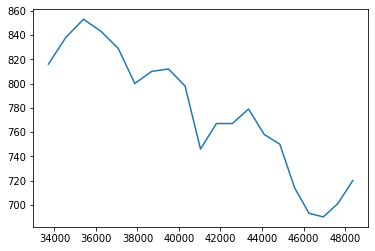

In [100]:
window_start, window_end = 40, 60
plt.plot(x_RR[window_start:window_end], series_RR[window_start:window_end])